In [1]:
import pandas as pd

seoul = pd.read_csv("C:/data/now_used/1019_data2_afewvalues.csv")
seoul

,rent_ua_log,연면적m2_log,usage_area_log,지하철거리m_log,승객수점수_log,건물별전기사용량_log,본번별평균사용량_log,횡단보도거리m_log,건물연차_log,평균월매출건수_log,평균주말매출금액_log,편의점임대료_log,공시지가_log,도로추정크기_log,유동인구비율_20대_log,유동인구비율_30대_log
0,2.576828,9.057781,4.634729,0.317097,11.670477,10.966265,9.668623,4.564931,2.484907,11.431043,19.673762,11.099402,16.607289,2.833213,3.477541,3.016515
1,2.475857,5.148134,5.220356,0.919740,10.749849,8.089789,8.089789,4.874347,2.484907,10.623812,19.087452,11.523086,17.018257,3.392829,2.964242,3.205588
2,1.329399,5.451167,4.064229,1.566886,10.276446,7.882315,7.882315,2.381712,2.197225,11.001916,19.563263,11.121873,15.860231,3.392829,3.296947,3.075005
3,0.711651,5.536547,4.075841,1.339887,10.440563,5.342334,5.966147,3.674244,2.197225,10.989268,18.558816,11.632675,15.400246,1.386294,3.270709,2.854169
4,1.464121,8.260837,5.913638,0.739877,10.638084,10.159524,9.668623,5.124638,1.945910,11.431043,19.673762,11.350467,16.243847,2.079442,3.477541,3.016515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0.768343,6.201948,6.664141,1.471793,9.096205,7.786552,8.090840,2.794677,3.465736,9.579003,17.786794,11.966227,15.553166,2.917771,2.677591,2.948116
9239,2.345590,6.895723,3.718196,-0.314921,10.421372,9.820052,9.414851,3.155424,3.688879,11.020431,19.606774,10.533602,16.347619,3.555348,3.038313,2.814210
9240,1.324886,6.609336,4.848900,0.715952,9.737559,9.576995,9.087692,4.582416,3.663562,11.020431,19.606774,10.533602,15.678660,1.386294,3.038313,2.814210
9241,1.541676,6.490724,5.673564,1.819036,10.009964,8.454253,9.200290,3.070895,3.295837,10.670466,19.033880,10.581802,15.726829,3.218876,2.954910,2.771338


In [2]:
seoul.columns[1:]

Index(['연면적m2_log', 'usage_area_log', '지하철거리m_log', '승객수점수_log',
       '건물별전기사용량_log', '본번별평균사용량_log', '횡단보도거리m_log', '건물연차_log',
       '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log', '공시지가_log', '도로추정크기_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log'],
      dtype='object')

In [3]:
# r-studio의 poly함수를 python에서 구현하기
import numpy as np

def poly(x, p):
    x = np.array(x)
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return np.linalg.qr(X)[0][:,1:]

In [4]:
for i in seoul.columns[1:]:
    df = pd.DataFrame(poly(seoul['{}'.format(i)], 2), columns = ['{}_1'.format(i), '{}_2'.format(i)])
    seoul = pd.concat([seoul, df], axis = 1)
    
seoul

<ipython-input-3-c769e2b131ec>:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.transpose(np.vstack((x**k for k in range(p+1))))


,rent_ua_log,연면적m2_log,usage_area_log,지하철거리m_log,승객수점수_log,건물별전기사용량_log,본번별평균사용량_log,횡단보도거리m_log,건물연차_log,평균월매출건수_log,...,편의점임대료_log_1,편의점임대료_log_2,공시지가_log_1,공시지가_log_2,도로추정크기_log_1,도로추정크기_log_2,유동인구비율_20대_log_1,유동인구비율_20대_log_2,유동인구비율_30대_log_1,유동인구비율_30대_log_2
0,2.576828,9.057781,4.634729,0.317097,11.670477,10.966265,9.668623,4.564931,2.484907,11.431043,...,-0.001186,-0.006094,-0.015402,0.004473,-0.001239,0.009171,0.007855,-0.006148,0.001601,-0.007357
1,2.475857,5.148134,5.220356,0.919740,10.749849,8.089789,8.089789,4.874347,2.484907,10.623812,...,-0.008327,-0.002955,-0.022931,0.016350,-0.009600,-0.006456,-0.008518,0.000731,-0.006997,-0.001724
2,1.329399,5.451167,4.064229,1.566886,10.276446,7.882315,7.882315,2.381712,2.197225,11.001916,...,-0.001565,-0.006071,-0.001714,-0.004641,-0.009600,-0.006456,0.002094,-0.007945,-0.001059,-0.006641
3,0.711651,5.536547,4.075841,1.339887,10.440563,5.342334,5.966147,3.674244,2.197225,10.989268,...,-0.010175,-0.001212,0.006713,-0.002246,0.020378,-0.012410,0.001257,-0.007825,0.008983,-0.004521
4,1.464121,8.260837,5.913638,0.739877,10.638084,10.159524,9.668623,5.124638,1.945910,11.431043,...,-0.005418,-0.004924,-0.008743,-0.001971,0.010022,0.009083,0.007855,-0.006148,0.001601,-0.007357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0.768343,6.201948,6.664141,1.471793,9.096205,7.786552,8.090840,2.794677,3.465736,9.579003,...,-0.015797,0.006445,0.003912,-0.003719,-0.002502,0.007667,-0.017661,0.020667,0.004711,-0.007026
9239,2.345590,6.895723,3.718196,-0.314921,10.421372,9.820052,9.414851,3.155424,3.688879,11.020431,...,0.008351,-0.001374,-0.010644,-0.000520,-0.012028,-0.013500,-0.006155,-0.002545,0.010800,-0.002736
9240,1.324886,6.609336,4.848900,0.715952,9.737559,9.576995,9.087692,4.582416,3.663562,11.020431,...,0.008351,-0.001374,0.001612,-0.004424,0.020378,-0.012410,-0.006155,-0.002545,0.010800,-0.002736
9241,1.541676,6.490724,5.673564,1.819036,10.009964,8.454253,9.200290,3.070895,3.295837,10.670466,...,0.007539,-0.002174,0.000730,-0.004574,-0.007001,-0.000167,-0.008816,0.001198,0.012750,-0.000343


In [5]:
for i in seoul.columns:
    print(i, '+', end = ' ')

rent_ua_log + 연면적m2_log + usage_area_log + 지하철거리m_log + 승객수점수_log + 건물별전기사용량_log + 본번별평균사용량_log + 횡단보도거리m_log + 건물연차_log + 평균월매출건수_log + 평균주말매출금액_log + 편의점임대료_log + 공시지가_log + 도로추정크기_log + 유동인구비율_20대_log + 유동인구비율_30대_log + 연면적m2_log_1 + 연면적m2_log_2 + usage_area_log_1 + usage_area_log_2 + 지하철거리m_log_1 + 지하철거리m_log_2 + 승객수점수_log_1 + 승객수점수_log_2 + 건물별전기사용량_log_1 + 건물별전기사용량_log_2 + 본번별평균사용량_log_1 + 본번별평균사용량_log_2 + 횡단보도거리m_log_1 + 횡단보도거리m_log_2 + 건물연차_log_1 + 건물연차_log_2 + 평균월매출건수_log_1 + 평균월매출건수_log_2 + 평균주말매출금액_log_1 + 평균주말매출금액_log_2 + 편의점임대료_log_1 + 편의점임대료_log_2 + 공시지가_log_1 + 공시지가_log_2 + 도로추정크기_log_1 + 도로추정크기_log_2 + 유동인구비율_20대_log_1 + 유동인구비율_20대_log_2 + 유동인구비율_30대_log_1 + 유동인구비율_30대_log_2 + 

In [6]:
from statsmodels.formula.api import ols
model = ols('rent_ua_log ~ 연면적m2_log_1 + 연면적m2_log_2 + usage_area_log_1 + usage_area_log_2 + 지하철거리m_log_1 + 지하철거리m_log_2 + 승객수점수_log_1 + 승객수점수_log_2 + 건물별전기사용량_log_1 + 건물별전기사용량_log_2 + 본번별평균사용량_log_1 + 본번별평균사용량_log_2 + 횡단보도거리m_log_1 + 횡단보도거리m_log_2 + 건물연차_log_1 + 건물연차_log_2 + 평균월매출건수_log_1 + 평균월매출건수_log_2 + 평균주말매출금액_log_1 + 평균주말매출금액_log_2 + 편의점임대료_log_1 + 편의점임대료_log_2 + 공시지가_log_1 + 공시지가_log_2 + 도로추정크기_log_1 + 도로추정크기_log_2 + 유동인구비율_20대_log_1 + 유동인구비율_20대_log_2 + 유동인구비율_30대_log_1 + 유동인구비율_30대_log_2', seoul)

# 모형 적합
res = model.fit()

# 분석 결과 확인
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_ua_log   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     262.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:13:16   Log-Likelihood:                -4488.1
No. Observations:                9243   AIC:                             9038.
Df Residuals:                    9212   BIC:                             9259.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.3959      0.004    340.707      0.000       1.388       1.404
연면적m2_log_1        -10.4819      0.884    -11.859      0.000     -12.214      -8.749
연면적m2_log_2          0.3584      0.535      0.670      0.503      -0.691       1.408
usage_area_log_1     8.2635      0.439     18.830      0.000       7.403       9.124
usage_area_log_2     3.2895      0.398      8.269      0.000       2.510       4.069
지하철거리m_log_1        -2.3648      0.481     -4.918      0.000      -3.307      -1.422
지하철거리m_log_2         0.9287      0.429      2.167      0.030       0.089       1.769
승객수점수_log_1         -5.5740      0.560     -9.959      0.000      -6.671      -4.477
승객수점수_log_2          0.7010      0.428      1.637      0.102      -0.138       1.540
건물별전기사용량_log_1       8.3735      0.803     10.426      0.000       6.799       9.948
건물별전기사용량_log_2       4.5151      0.608      7.428      0.000       3.324       5.707
본번별평균사용량_log_1       5.6168      0.612      9.183      0.000       4.418       6.816
본번별평균사용량_log_2      -0.2599      0.494     -0.526      0.599      -1.229       0.709
횡단보도거리m_log_1        1.7398      0.462      3.765      0.000       0.834       2.646
횡단보도거리m_log_2       -1.4928      0.407     -3.671      0.000      -2.290      -0.696
건물연차_log_1          -6.2936      0.448    -14.038      0.000      -7.172      -5.415
건물연차_log_2           1.6289      0.423      3.848      0.000       0.799       2.459
평균월매출건수_log_1       -5.4339      0.946     -5.742      0.000      -7.289      -3.579
평균월매출건수_log_2        0.3232      0.701      0.461      0.645      -1.051       1.697
평균주말매출금액_log_1       7.5659      0.902      8.392      0.000       5.799       9.333
평균주말매출금액_log_2       0.4711      0.712      0.662      0.508      -0.924       1.866
편의점임대료_log_1        -1.9800      0.460     -4.302      0.000      -2.882      -1.078
편의점임대료_log_2         0.4165      0.401      1.039      0.299      -0.370       1.203
공시지가_log_1         -23.7728      0.597    -39.807      0.000     -24.943     -22.602
공시지가_log_2           1.9694      0.411      4.791      0.000       1.164       2.775
도로추정크기_log_1        -4.6288      0.519     -8.910      0.000      -5.647      -3.611
도로추정크기_log_2        -1.3058      0.428     -3.051      0.002      -2.145      -0.467
유동인구비율_20대_log_1     3.3711      0.504      6.690      0.000       2.383       4.359
유동인구비율_20대_log_2     0.7241      0.469      1.544      0.123      -0.195       1.644
유동인구비율_30대_log_1     0.8820      0.499      1.768      0.077      -0.096       1.860
유동인구비율_30대_log_2     0.2180      0.441      0.494      0.621      -0.647       1.083
==============================================================================
Omnibus:                      376.212   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.0

In [7]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,연면적m2_log_1,5.035339
1,연면적m2_log_2,1.847168
2,usage_area_log_1,1.241321
3,usage_area_log_2,1.020063
4,지하철거리m_log_1,1.490544
5,지하철거리m_log_2,1.183555
6,승객수점수_log_1,2.019151
7,승객수점수_log_2,1.181612
8,건물별전기사용량_log_1,4.157504
9,건물별전기사용량_log_2,2.381404


In [8]:
# p-value값이 0.05 이상인 애는 원래 log데이터로 사용해보기

from statsmodels.formula.api import ols
model = ols('rent_ua_log ~ 연면적m2_log + usage_area_log_1 + usage_area_log_2 + 지하철거리m_log_1 + 지하철거리m_log_2 + 승객수점수_log + 건물별전기사용량_log_1 + 건물별전기사용량_log_2 + 본번별평균사용량_log + 횡단보도거리m_log_1 + 횡단보도거리m_log_2 + 건물연차_log_1 + 건물연차_log_2 + 평균월매출건수_log + 평균주말매출금액_log + 편의점임대료_log + 공시지가_log_1 + 공시지가_log_2 + 도로추정크기_log_1 + 도로추정크기_log_2 + 유동인구비율_20대_log + 유동인구비율_30대_log', seoul)

# 모형 적합
res = model.fit()

# 분석 결과 확인
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent_ua_log   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     357.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:13:17   Log-Likelihood:                -4495.2
No. Observations:                9243   AIC:                             9036.
Df Residuals:                    9220   BIC:                             9200.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9348      0.200     -4.672      0.000      -1.327      -0.543
연면적m2_log           -0.0888      0.007    -12.714      0.000      -0.102      -0.075
usage_area_log_1     8.2239      0.436     18.851      0.000       7.369       9.079
usage_area_log_2     3.2647      0.397      8.226      0.000       2.487       4.043
지하철거리m_log_1        -2.2453      0.475     -4.728      0.000      -3.176      -1.315
지하철거리m_log_2         1.1812      0.407      2.900      0.004       0.383       1.979
승객수점수_log            0.0645      0.007      9.884      0.000       0.052       0.077
건물별전기사용량_log_1       8.2756      0.765     10.818      0.000       6.776       9.775
건물별전기사용량_log_2       4.4821      0.484      9.263      0.000       3.534       5.431
본번별평균사용량_log         0.0534      0.006      9.444      0.000       0.042       0.065
횡단보도거리m_log_1        1.7095      0.461      3.710      0.000       0.806       2.613
횡단보도거리m_log_2       -1.5456      0.405     -3.812      0.000      -2.340      -0.751
건물연차_log_1          -6.3376      0.447    -14.172      0.000      -7.214      -5.461
건물연차_log_2           1.6211      0.419      3.868      0.000       0.799       2.443
평균월매출건수_log         -0.1160      0.017     -6.676      0.000      -0.150      -0.082
평균주말매출금액_log         0.1270      0.014      9.144      0.000       0.100       0.154
편의점임대료_log           0.0349      0.008      4.515      0.000       0.020       0.050
공시지가_log_1         -24.1870      0.575    -42.059      0.000     -25.314     -23.060
공시지가_log_2           2.1297      0.405      5.265      0.000       1.337       2.923
도로추정크기_log_1        -4.4089      0.513     -8.601      0.000      -5.414      -3.404
도로추정크기_log_2        -1.2918      0.426     -3.032      0.002      -2.127      -0.457
유동인구비율_20대_log       0.1117      0.015      7.275      0.000       0.082       0.142
유동인구비율_30대_log      -0.0645      0.021     -3.104      0.002      -0.105      -0.024
==============================================================================
Omnibus:                      374.249   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1007.993
Skew:                          -0.177   Prob(JB):                    1.31e-219
Kurtosis:                       4.579   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,연면적m2_log,4.234154
1,usage_area_log_1,1.225895
2,usage_area_log_2,1.014524
3,지하철거리m_log_1,1.452404
4,지하철거리m_log_2,1.068240
5,승객수점수_log,1.981344
6,건물별전기사용량_log_1,3.769516
7,건물별전기사용량_log_2,1.508158
8,본번별평균사용량_log,2.273897
9,횡단보도거리m_log_1,1.367385


In [10]:
seoul.columns

Index(['rent_ua_log', '연면적m2_log', 'usage_area_log', '지하철거리m_log', '승객수점수_log',
       '건물별전기사용량_log', '본번별평균사용량_log', '횡단보도거리m_log', '건물연차_log',
       '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log', '공시지가_log', '도로추정크기_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log', '연면적m2_log_1', '연면적m2_log_2',
       'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2',
       '승객수점수_log_1', '승객수점수_log_2', '건물별전기사용량_log_1', '건물별전기사용량_log_2',
       '본번별평균사용량_log_1', '본번별평균사용량_log_2', '횡단보도거리m_log_1', '횡단보도거리m_log_2',
       '건물연차_log_1', '건물연차_log_2', '평균월매출건수_log_1', '평균월매출건수_log_2',
       '평균주말매출금액_log_1', '평균주말매출금액_log_2', '편의점임대료_log_1', '편의점임대료_log_2',
       '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2',
       '유동인구비율_20대_log_1', '유동인구비율_20대_log_2', '유동인구비율_30대_log_1',
       '유동인구비율_30대_log_2'],
      dtype='object')

## RF 분석

In [11]:
# 전체 변수
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

x = seoul[['연면적m2_log', 'usage_area_log', '지하철거리m_log', '승객수점수_log',
       '건물별전기사용량_log', '본번별평균사용량_log', '횡단보도거리m_log', '건물연차_log',
       '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log', '공시지가_log', '도로추정크기_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log', '연면적m2_log_1', '연면적m2_log_2',
       'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2',
       '승객수점수_log_1', '승객수점수_log_2', '건물별전기사용량_log_1', '건물별전기사용량_log_2',
       '본번별평균사용량_log_1', '본번별평균사용량_log_2', '횡단보도거리m_log_1', '횡단보도거리m_log_2',
       '건물연차_log_1', '건물연차_log_2', '평균월매출건수_log_1', '평균월매출건수_log_2',
       '평균주말매출금액_log_1', '평균주말매출금액_log_2', '편의점임대료_log_1', '편의점임대료_log_2',
       '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2',
       '유동인구비율_20대_log_1', '유동인구비율_20대_log_2', '유동인구비율_30대_log_1',
       '유동인구비율_30대_log_2']]
y = seoul['rent_ua_log']


# train/test 데이터로 나누기
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [12]:
# RandomForestRegressor 갖고오기
model = RandomForestRegressor(n_estimators = 1000, oob_score = True)
# train 데이터 학습시키기
model.fit(x_train,y_train)
# 변수들 중요도 
model.feature_importances_
# x_test(테스트)데이터로 예측결과 뽑아보기
y_pred = model.predict(x_test)

y_pred

array([1.78513892, 2.19928458, 1.24593662, ..., 1.12320194, 0.98579949,
       1.23076314])

In [14]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse 

0.38595846970659803

In [16]:
# 변수이름 + 중요도로 데이터프레임 만들기
pd.DataFrame({'변수' : ['연면적m2_log', 'usage_area_log', '지하철거리m_log', '승객수점수_log',
       '건물별전기사용량_log', '본번별평균사용량_log', '횡단보도거리m_log', '건물연차_log',
       '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log', '공시지가_log', '도로추정크기_log',
       '유동인구비율_20대_log', '유동인구비율_30대_log', '연면적m2_log_1', '연면적m2_log_2',
       'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2',
       '승객수점수_log_1', '승객수점수_log_2', '건물별전기사용량_log_1', '건물별전기사용량_log_2',
       '본번별평균사용량_log_1', '본번별평균사용량_log_2', '횡단보도거리m_log_1', '횡단보도거리m_log_2',
       '건물연차_log_1', '건물연차_log_2', '평균월매출건수_log_1', '평균월매출건수_log_2',
       '평균주말매출금액_log_1', '평균주말매출금액_log_2', '편의점임대료_log_1', '편의점임대료_log_2',
       '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2',
       '유동인구비율_20대_log_1', '유동인구비율_20대_log_2', '유동인구비율_30대_log_1',
       '유동인구비율_30대_log_2'], 'importance' : model.feature_importances_})

,변수,importance
0,연면적m2_log,0.012751
1,usage_area_log,0.026916
2,지하철거리m_log,0.015241
3,승객수점수_log,0.020544
4,건물별전기사용량_log,0.020236
5,본번별평균사용량_log,0.014669
6,횡단보도거리m_log,0.011715
7,건물연차_log,0.013354
8,평균월매출건수_log,0.007767
9,평균주말매출금액_log,0.008853


In [17]:
# 실제값과 예측값 비교해보기
pd.DataFrame({'y':y_test,'y_pred':y_pred})

,y,y_pred
4326,1.250921,1.785139
7418,2.503256,2.199285
4958,0.924827,1.245937
7114,1.566429,1.901297
2998,0.231802,0.959862
...,...,...
1668,0.622130,0.682383
2467,0.810719,0.602740
3114,0.837711,1.123202
2182,0.906478,0.985799


In [18]:
format(model.score(x_train, y_train))

'0.9288919435448553'

In [19]:
format(model.score(x_test, y_test))

'0.4752502490013125'

In [20]:
# 회귀분석에서 결과 좋았던 변수만

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

x = seoul[['연면적m2_log', 'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2', '승객수점수_log',
           '건물별전기사용량_log_1', '건물별전기사용량_log_2', '본번별평균사용량_log', '횡단보도거리m_log_1', '횡단보도거리m_log_2',
           '건물연차_log_1', '건물연차_log_2', '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log',
           '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2','유동인구비율_20대_log', '유동인구비율_30대_log']]
y = seoul['rent_ua_log']


# train/test 데이터로 나누기
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [21]:
# RandomForestRegressor 갖고오기
model = RandomForestRegressor(n_estimators = 1000, oob_score = True)
# train 데이터 학습시키기
model.fit(x_train,y_train)
# 변수들 중요도 
model.feature_importances_
# x_test(테스트)데이터로 예측결과 뽑아보기
y_pred = model.predict(x_test)

y_pred

array([1.78015773, 2.25002665, 1.23962982, ..., 1.05952843, 0.97585615,
       1.29449388])

In [22]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(y_test,y_pred))
rmse 

0.38584406987719755

In [23]:
# 변수이름 + 중요도로 데이터프레임 만들기
pd.DataFrame({'변수' : ['연면적m2_log', 'usage_area_log_1', 'usage_area_log_2', '지하철거리m_log_1', '지하철거리m_log_2', '승객수점수_log',
           '건물별전기사용량_log_1', '건물별전기사용량_log_2', '본번별평균사용량_log', '횡단보도거리m_log_1', '횡단보도거리m_log_2',
           '건물연차_log_1', '건물연차_log_2', '평균월매출건수_log', '평균주말매출금액_log', '편의점임대료_log',
           '공시지가_log_1', '공시지가_log_2', '도로추정크기_log_1', '도로추정크기_log_2','유동인구비율_20대_log', '유동인구비율_30대_log'], 'importance' : model.feature_importances_})

,변수,importance
0,연면적m2_log,0.041583
1,usage_area_log_1,0.057076
2,usage_area_log_2,0.025729
3,지하철거리m_log_1,0.033147
4,지하철거리m_log_2,0.023701
5,승객수점수_log,0.051054
6,건물별전기사용량_log_1,0.043703
7,건물별전기사용량_log_2,0.023667
8,본번별평균사용량_log,0.040715
9,횡단보도거리m_log_1,0.025801


In [24]:
# 실제값과 예측값 비교해보기
pd.DataFrame({'y':y_test,'y_pred':y_pred})

,y,y_pred
4326,1.250921,1.780158
7418,2.503256,2.250027
4958,0.924827,1.239630
7114,1.566429,1.862137
2998,0.231802,0.965533
...,...,...
1668,0.622130,0.646776
2467,0.810719,0.585522
3114,0.837711,1.059528
2182,0.906478,0.975856


In [25]:
format(model.score(x_train, y_train))

'0.9289893799159954'

In [26]:
format(model.score(x_test, y_test))

'0.4755612792801225'

In [27]:
import seaborn as sns

final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred)], axis = 1)
final_result.columns = ['label','predict']

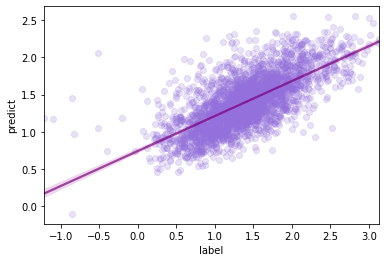

In [28]:
sns.regplot(x = 'label', y = 'predict', data = final_result,
           scatter_kws = {'color' : 'mediumpurple', 'alpha' : 0.2},
           line_kws = {'color' : 'purple', 'alpha' : 0.7})